In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
tqdm.pandas()

import ast
import json
import os
import math
import string
import re

from itertools import combinations
from scipy.stats import kendalltau, spearmanr
import rbo

# 1. Human correlation

In [2]:
batch_pilot = '../batches/AMT/batch_pilot.csv'
batch_mid_1 = '../batches/AMT/batch_mid_1.csv'
batch_mid_2 = '../batches/AMT/batch_mid_2.csv'
batch_final_1 = '../batches/AMT/batch_final_1.csv'
batch_final_2= '../batches/AMT/batch_final_2.csv'

In [3]:
batch_pilot_2nd = '../batches/AMT/batch_pilot_2nd.csv'
batch_mid_1_2nd = '../batches/AMT/batch_mid_1_2nd.csv'
batch_mid_2_2nd = '../batches/AMT/batch_mid_2_2nd.csv'
batch_final_1_2nd = '../batches/AMT/batch_final_1_2nd.csv'
batch_final_2_2nd = '../batches/AMT/batch_final_2_2nd.csv'

In [4]:
def convert_amt_to_df(batch_path):

    d = pd.read_csv(batch_path)
    d = d[['AssignmentId', 'WorkerId', 'Answer.taskAnswers', 'SubmitTime', 'WorkTimeInSeconds']]
    d['WorkTime_min'] = d['WorkTimeInSeconds']/60
    d = d[['AssignmentId', 'WorkerId', 'Answer.taskAnswers', 'SubmitTime','WorkTime_min']]

    return d

In [5]:
df_pilot = convert_amt_to_df(batch_pilot)
df_mid1 = convert_amt_to_df(batch_mid_1)
df_mid2 = convert_amt_to_df(batch_mid_2)
df_final1 = convert_amt_to_df(batch_final_1)
df_final2 = convert_amt_to_df(batch_final_2)

In [6]:
df_pilot_2 = convert_amt_to_df(batch_pilot_2nd)
df_mid1_2 = convert_amt_to_df(batch_mid_1_2nd)
df_mid2_2 = convert_amt_to_df(batch_mid_2_2nd)
df_final1_2 = convert_amt_to_df(batch_final_1_2nd)
df_final2_2 = convert_amt_to_df(batch_final_2_2nd)

In [7]:
df_pilot.drop(4, inplace=True)

In [8]:
df_pilot_2 = df_pilot_2.loc[(df_pilot_2.WorkerId == 'AAHQAOHHLCBQE') | (df_pilot_2.WorkerId == 'A8L4X8QCFIKVZ')]

In [9]:
df_pilot_2

,AssignmentId,WorkerId,Answer.taskAnswers,SubmitTime,WorkTime_min
5,3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK,AAHQAOHHLCBQE,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:07:18 PDT 2023,30.516667
6,3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ,A8L4X8QCFIKVZ,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:49:39 PDT 2023,88.100000


In [10]:
df_mid = df_pilot.merge(df_mid1[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid = df_mid.rename(columns={'Answer.taskAnswers_x':'pilot', 'Answer.taskAnswers_y':'mid1', 'WorkTime_min_x':'time_pilot', 'WorkTime_min_y':'time_mid1'})
df_mid = df_mid.merge(df_mid2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid = df_mid.rename(columns={'Answer.taskAnswers':'mid2', 'WorkTime_min':'time_mid2'})

df_all = df_mid.merge(df_final1[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all = df_all.rename(columns={'Answer.taskAnswers':'final1', 'WorkTime_min':'time_final1'})
df_all = df_all.merge(df_final2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all = df_all.rename(columns={'Answer.taskAnswers':'final2', 'WorkTime_min':'time_final2'})

df_all

,AssignmentId,WorkerId,pilot,SubmitTime,time_pilot,mid1,time_mid1,mid2,time_mid2,final1,time_final1,final2,time_final2
0,339ANSOTRFSOAYBU0AR45MM8S6LKIJ,A1MUWHFRJIFF2E,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 11:51:04 PDT 2023,8.150000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",19.633333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",21.933333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",41.516667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",28.433333
1,3HFNH7HEMR4WPA3UNRBYGWL1CZLGQF,A1GKWKKKPD14LI,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 11:51:01 PDT 2023,8.483333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",19.866667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",21.766667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",31.683333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",38.283333
2,3Q5ZZ9ZEVY5S39EEK1B7Q89CSM9583,A2PYR2H7X7AODL,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Sat Aug 12 00:01:43 PDT 2023,52.733333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",73.533333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",68.933333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",121.766667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",135.816667
3,3TY7ZAOG5PAD33UEWK2YZIMC6ELK09,A1YAZDV0TK3CKY,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 22:42:37 PDT 2023,63.366667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",110.150000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",72.316667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",71.450000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",70.250000


In [11]:
df_mid_2 = df_pilot_2.merge(df_mid1_2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_mid_2 = df_mid_2.rename(columns={'Answer.taskAnswers_x':'pilot', 'Answer.taskAnswers_y':'mid1', 'WorkTime_min_x':'time_pilot', 'WorkTime_min_y':'time_mid1'})
df_mid_2 = df_mid_2.merge(df_mid2_2[['WorkerId', 'Answer.taskAnswers','WorkTime_min' ]], how='left', on='WorkerId')
df_mid_2 = df_mid_2.rename(columns={'Answer.taskAnswers':'mid2', 'WorkTime_min':'time_mid2'})

df_all_2 = df_mid_2.merge(df_final1_2[['WorkerId', 'Answer.taskAnswers',  'WorkTime_min']], how='left', on='WorkerId')
df_all_2 = df_all_2.rename(columns={'Answer.taskAnswers':'final1', 'WorkTime_min':'time_final1'})
df_all_2 = df_all_2.merge(df_final2_2[['WorkerId', 'Answer.taskAnswers', 'WorkTime_min']], how='left', on='WorkerId')
df_all_2 = df_all_2.rename(columns={'Answer.taskAnswers':'final2', 'WorkTime_min':'time_final2'})

df_all_2

,AssignmentId,WorkerId,pilot,SubmitTime,time_pilot,mid1,time_mid1,mid2,time_mid2,final1,time_final1,final2,time_final2
0,3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK,AAHQAOHHLCBQE,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:07:18 PDT 2023,30.516667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",73.383333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",37.65,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",71.266667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",29.233333
1,3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ,A8L4X8QCFIKVZ,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:49:39 PDT 2023,88.100000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",36.200000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",63.25,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",103.350000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",134.266667


In [12]:
df_all = pd.concat([df_all, df_all_2]) # concat first four amt with the last two amt workers

In [13]:
df_all = df_all.reset_index(drop=True)

In [14]:
df_all

,AssignmentId,WorkerId,pilot,SubmitTime,time_pilot,mid1,time_mid1,mid2,time_mid2,final1,time_final1,final2,time_final2
0,339ANSOTRFSOAYBU0AR45MM8S6LKIJ,A1MUWHFRJIFF2E,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 11:51:04 PDT 2023,8.150000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",19.633333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",21.933333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",41.516667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",28.433333
1,3HFNH7HEMR4WPA3UNRBYGWL1CZLGQF,A1GKWKKKPD14LI,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 11:51:01 PDT 2023,8.483333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",19.866667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",21.766667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",31.683333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",38.283333
2,3Q5ZZ9ZEVY5S39EEK1B7Q89CSM9583,A2PYR2H7X7AODL,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Sat Aug 12 00:01:43 PDT 2023,52.733333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",73.533333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",68.933333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",121.766667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",135.816667
3,3TY7ZAOG5PAD33UEWK2YZIMC6ELK09,A1YAZDV0TK3CKY,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Fri Aug 11 22:42:37 PDT 2023,63.366667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",110.150000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",72.316667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",71.450000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",70.250000
4,3QUO65DNQ4EC9GR9SJ8BV6RSAKLUOK,AAHQAOHHLCBQE,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:07:18 PDT 2023,30.516667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",73.383333,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",37.650000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",71.266667,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",29.233333
5,3XCC1ODXDV1NE0C8325AF0Z8IMXRQJ,A8L4X8QCFIKVZ,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",Wed Sep 06 10:49:39 PDT 2023,88.100000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",36.200000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",63.250000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",103.350000,"[{""amt_output_toy"":""[{\""exampleIndex\"":0,\""met...",134.266667


Average Time to complete

In [15]:
np.mean(((df_all.time_pilot.values) + (df_all.time_mid1.values) + + (df_all.time_mid2.values) + (df_all.time_final1.values) + (df_all.time_final2.values))/50)

5.824277777777778

In [16]:
def parse_amt_answers(pd_answer):

    input_string = pd_answer

    # Convert the string to a list of dictionaries
    list_of_dicts = json.loads(input_string)

    # The inner JSON string is still escaped, so we need to parse it again
    inner_json_str = list_of_dicts[0]["amt_output_toy"]
    inner_list_of_dicts = json.loads(inner_json_str)

    # Update the outer dictionary with the processed inner list
    list_of_dicts[0]["amt_output_toy"] = inner_list_of_dicts

    # Print the final result as a Python dictionary
    result_dict = list_of_dicts[0]['amt_output_toy']

    return result_dict

In [17]:
def combine_outputs_by_annotator(annot_idx):

    rounds = ['pilot', 'mid1', 'mid2', 'final1', 'final2']
    df = pd.DataFrame()
    for round in rounds:
        A = parse_amt_answers(df_all[round][annot_idx])
                
        # Extract the 'exampleIndex' and 'methods' lists from each dictionary
        example_indices = [item['exampleIndex'] for item in A]
        # methods_lists = [item['methods'] for item in A]
        methods_lists = [[method for method in item['methods'] if method != 'black-bar'] for item in A]

        # Create a DataFrame
        df = pd.concat([df, pd.DataFrame(methods_lists, index=example_indices, columns=['rank_{}'.format(i) for i in range(1, len(methods_lists[0]) + 1)])]).reset_index(drop=True)

    # Convert system to corresponding model name
    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    for idx, examples in enumerate(model_info):
        systems_lst = list(examples.values())
        model_lst = list(examples.keys())
        for column in df.columns:
            if df.at[idx, column] in systems_lst:
                corr_model_idx = systems_lst.index(df.at[idx, column])
                df.at[idx, column] = model_lst[corr_model_idx]

    df.to_csv('../batches/AMT/model_annot{}.csv'.format(annot_idx), index=False)
    return df

In [18]:
annot_0 = combine_outputs_by_annotator(0)
annot_1 = combine_outputs_by_annotator(1)
annot_2 = combine_outputs_by_annotator(2)
annot_3 = combine_outputs_by_annotator(3)
annot_4 = combine_outputs_by_annotator(4)
annot_5 = combine_outputs_by_annotator(5)

In [19]:
annot_0.head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15
0,vicuna,baize,wizardlm,gpt4,cohere,instructgpt,chatgpt,dolly,koala,mpt,openassist,redpajama,llama,alpaca,falcon
1,baize,redpajama,llama,mpt,vicuna,koala,wizardlm,chatgpt,instructgpt,gpt4,cohere,dolly,openassist,alpaca,falcon
2,baize,wizardlm,gpt4,falcon,vicuna,koala,chatgpt,instructgpt,cohere,dolly,openassist,redpajama,mpt,alpaca,llama
3,chatgpt,gpt4,vicuna,baize,koala,wizardlm,instructgpt,cohere,dolly,openassist,redpajama,mpt,alpaca,falcon,llama
4,baize,koala,wizardlm,chatgpt,cohere,gpt4,vicuna,openassist,dolly,alpaca,mpt,falcon,instructgpt,redpajama,llama


New: remove all `redpajama` & `dolly` ranking (ACL ver.)

In [21]:
annot_0_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_0.shape[0]):
    row_ranks = annot_0.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_0_new_dolly.loc[i] = row_ranks

annot_1_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_1.shape[0]):
    row_ranks = annot_1.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_1_new_dolly.loc[i] = row_ranks

annot_2_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_2.shape[0]):
    row_ranks = annot_2.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_2_new_dolly.loc[i] = row_ranks

annot_3_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_3.shape[0]):
    row_ranks = annot_3.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_3_new_dolly.loc[i] = row_ranks

annot_4_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_4.shape[0]):
    row_ranks = annot_4.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_4_new_dolly.loc[i] = row_ranks  

annot_5_new_dolly = pd.DataFrame(columns=[f'rank_{i}' for i in range(1, 14)])
for i in range(annot_5.shape[0]):
    row_ranks = annot_5.iloc[i].tolist()
    row_ranks.remove('redpajama')
    row_ranks.remove('dolly')
    annot_5_new_dolly.loc[i] = row_ranks  

In [22]:
annot_5_new_dolly.head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13
0,chatgpt,cohere,gpt4,alpaca,instructgpt,vicuna,baize,koala,wizardlm,mpt,falcon,llama,openassist
1,gpt4,baize,koala,wizardlm,chatgpt,vicuna,instructgpt,openassist,cohere,falcon,llama,alpaca,mpt
2,vicuna,baize,instructgpt,gpt4,koala,openassist,wizardlm,cohere,chatgpt,mpt,alpaca,llama,falcon
3,baize,vicuna,koala,wizardlm,chatgpt,gpt4,cohere,openassist,mpt,instructgpt,falcon,alpaca,llama
4,baize,chatgpt,instructgpt,openassist,wizardlm,gpt4,vicuna,mpt,koala,alpaca,cohere,falcon,llama


In [23]:
def compute_pairwise_counts(df, annot_idx):
    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)

    f.close()

    models = list(model_info[0].keys()) # a list of all LLM names (15)

    #### NEW
    models.remove('redpajama') # remove 'redpajama'
    models.remove('dolly') # remove 'dolly'

    model_pairs = list(combinations(models, 2))
    default_value = 0
    all_count_dicts = []

    with open('human_annotations/annot_{}_new.json'.format(annot_idx), 'w') as j:

        for idx in tqdm(range(df.shape[0])):
            count_dict = dict.fromkeys(models, default_value)
            annot_example = df.loc[idx].values
            for i, pair in enumerate(model_pairs):
                if np.where(annot_example == pair[0]) < np.where(annot_example == pair[1]):
                    count_dict[pair[0]] += 1
                else:
                    count_dict[pair[1]] += 1
            all_count_dicts.append(count_dict)
        
        json.dump(all_count_dicts, j, indent=4)

    j.close()

In [24]:
compute_pairwise_counts(annot_0_new_dolly, 1)
compute_pairwise_counts(annot_1_new_dolly, 2)
compute_pairwise_counts(annot_2_new_dolly, 3)
compute_pairwise_counts(annot_3_new_dolly, 4)
compute_pairwise_counts(annot_4_new_dolly, 5)
compute_pairwise_counts(annot_5_new_dolly, 6)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 2892.14it/s]


## Inter-annotator agreement

Top-k similarity with RBO scores (k=5)

In [25]:
def compute_rbo_similarity(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, num_y))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(i, num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo_ext(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)
    return avg_iaa

In [26]:
compute_rbo_similarity([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], 
[annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], 6,6, 15)

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.5369333333333334
[[1.    0.694 0.466 0.469 0.511 0.484]
 [0.    1.    0.471 0.483 0.515 0.512]
 [0.    0.    1.    0.572 0.589 0.548]
 [0.    0.    0.    1.    0.607 0.536]
 [0.    0.    0.    0.    1.    0.597]
 [0.    0.    0.    0.    0.    1.   ]]


0.5369333333333334

### Combination Search

In [30]:
def find_highest_iaa(annot_lists, num_comb):
    
    # combination of models 
    best_comb = None 
    best_iaa = 0
    best_k = 0
    all_annot_idx = [0, 1, 2, 3, 4, 5]
    for comb_annot in combinations(all_annot_idx, num_comb):
        print(f"Combinations: {comb_annot}")
        annot_lst = []
        for annot_idx in comb_annot:
            annot_lst.append(annot_lists[annot_idx])
        
        # run rbo similarity with different k
        for k in range(1, 16):
            avg_rbo = compute_rbo_similarity(annot_lst, annot_lst, len(annot_lst), len(annot_lst), k)
            if avg_rbo > best_iaa:
                best_comb = comb_annot 
                best_iaa = avg_rbo
                best_k = k

    print(f"Best comb: {best_comb}")
    print(f"Best IAA: {best_iaa}")
    print(f"Best top k: {best_k}") 

        

In [31]:
annots = [annot_0.values, annot_1.values, annot_2.values, annot_3.values, annot_4.values, annot_5.values]

find_highest_iaa(annots, 2)

Combinations: (0, 1)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.636
[[0.    0.636]
 [0.    0.   ]]
Pairwise Rank-biase

In [32]:
find_highest_iaa(annots, 3)

Combinations: (0, 1, 2)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41 ]
 [0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48466666666666663
[[0.    0.636 0.408]
 [0.    0.    0.41

In [33]:
find_highest_iaa(annots, 4)

Combinations: (0, 1, 2, 3)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4705000000000001
[[0.    0.636 0.408 0.413]
 [0.    0.    0.41  0.43 ]
 [0.    0.    0.    0.526]
 [0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 


In [34]:
find_highest_iaa(annots, 5)

Combinations: (0, 1, 2, 3, 4)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.48069999999999996
[[0.    0.636 0.408 0.413 0.44 ]
 [0.    0.    0.41  0.43  0.45 ]
 [0.    0.    0.    0.526 0.544]
 [0.    0.    0.    0.    0.55 ]
 [0.    0.    0.    0.  

In [35]:
find_highest_iaa(annots, 6)

Combinations: (0, 1, 2, 3, 4, 5)
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4778666666666666
[[0.    0.636 0.408 0.413 0.44  0.414]
 [0.    0.    0.41  0.43  0.45  0.438]
 [0.    0.    0.    0.526 0.544 0.492]
 [0.    0.    0.    0.    0.55  0.472]
 [0.    0.    0.    0.    0.    0.545]
 [0.    0.    0.    0.    0.    0.   ]]
Pairwise Rank-biased Overlap

Old one (w/ only four workers)

In [36]:
# compute_rbo_similarity([annot_0.values, annot_1.values, annot_2.values, annot_3.values], 
# [annot_0.values, annot_1.values, annot_2.values, annot_3.values], 4,4)

## Model Annotation Preprocess

In [27]:
# Initial setup
model_info_path = 'model_annotations/human_annotation_gt_formatted.json'

# (0) Read the formatted JSON file for model names
with open(model_info_path, 'r') as f:
    model_info = json.load(f)
    model_names_old = list(model_info[0].keys())
    model_names_old.remove('redpajama')  # remove 'redpajama' and 'dolly' as evaluators
    model_names_old.remove('dolly')

# Process each model
for model in model_names_old:
    print(f'loading {model}')
    file_path = f'model_annotations/new/nC2_preferences_{model}.json'
    
    try:
        # (1) Open the unformatted json file
        with open(file_path, 'r') as f:
            data = f.read()

        # (2) Assume each JSON object is separated by newlines and parse
        json_strings = data.strip().split('\n')
        json_data = [json.loads(json_string) for json_string in json_strings]

        # (3) Write the modified content back to the file
        with open(file_path, 'w') as file:
            json.dump(json_data, file, indent=4)
            
    except json.JSONDecodeError as e:
        print(f'Error processing {model}:', e)
    except Exception as e:
        print(f'Unexpected error with {model}:', e)

loading vicuna
Error processing vicuna: Expecting value: line 1 column 2 (char 1)
loading baize
Error processing baize: Expecting value: line 1 column 2 (char 1)
loading koala
Error processing koala: Expecting value: line 1 column 2 (char 1)
loading wizardlm
Error processing wizardlm: Expecting value: line 1 column 2 (char 1)
loading chatgpt
Error processing chatgpt: Expecting value: line 1 column 2 (char 1)
loading instructgpt
Error processing instructgpt: Expecting value: line 1 column 2 (char 1)
loading gpt4
Error processing gpt4: Expecting value: line 1 column 2 (char 1)
loading cohere
Error processing cohere: Expecting value: line 1 column 2 (char 1)
loading openassist
Error processing openassist: Expecting value: line 1 column 2 (char 1)
loading mpt
Error processing mpt: Expecting value: line 1 column 2 (char 1)
loading alpaca
Error processing alpaca: Expecting value: line 1 column 2 (char 1)
loading falcon
Error processing falcon: Expecting value: line 1 column 2 (char 1)
loadin

### (1) old model names (as evaluators): 13

In [28]:
model_names_old

['vicuna',
 'baize',
 'koala',
 'wizardlm',
 'chatgpt',
 'instructgpt',
 'gpt4',
 'cohere',
 'openassist',
 'mpt',
 'alpaca',
 'falcon',
 'llama']

In [29]:
model_rank_data = {}

for model in model_names_old:
    print('loading {}'.format(model))
    with open('model_annotations/new/nC2_preferences_{}.json'.format(model), 'r') as f:
        data = json.load(f)
    model_rank_data[model] = data

loading vicuna
loading baize
loading koala
loading wizardlm
loading chatgpt
loading instructgpt
loading gpt4
loading cohere
loading openassist
loading mpt
loading alpaca
loading falcon
loading llama


In [30]:
model_rank_data

{'vicuna': [{'vicuna': 7,
   'baize': 8,
   'koala': 6,
   'wizardlm': 7,
   'chatgpt': 4,
   'instructgpt': 8,
   'gpt4': 10,
   'cohere': 10,
   'dolly': 8,
   'openassist': 6,
   'redpajama': 2,
   'mpt': 7,
   'alpaca': 7,
   'falcon': 6,
   'llama': 6},
  {'vicuna': 13,
   'baize': 10,
   'koala': 9,
   'wizardlm': 7,
   'chatgpt': 4,
   'instructgpt': 7,
   'gpt4': 6,
   'cohere': 8,
   'dolly': 6,
   'openassist': 5,
   'redpajama': 3,
   'mpt': 4,
   'alpaca': 4,
   'falcon': 3,
   'llama': 1},
  {'vicuna': 7,
   'baize': 6,
   'koala': 6,
   'wizardlm': 7,
   'chatgpt': 8,
   'instructgpt': 9,
   'gpt4': 12,
   'cohere': 7,
   'dolly': 1,
   'openassist': 4,
   'redpajama': 5,
   'mpt': 5,
   'alpaca': 3,
   'falcon': 10,
   'llama': 8},
  {'vicuna': 9,
   'baize': 8,
   'koala': 9,
   'wizardlm': 8,
   'chatgpt': 10,
   'instructgpt': 10,
   'gpt4': 4,
   'cohere': 7,
   'dolly': 9,
   'openassist': 10,
   'redpajama': 5,
   'mpt': 3,
   'alpaca': 4,
   'falcon': 4,
   'llama

In [31]:
sorted_rank_data = {}
for model, ranks in model_rank_data.items():
        sorted_model = []
        for example_output in ranks:
                example_output_sorted = sorted(example_output, key=lambda x: (-example_output[x], x))
                example_output_sorted.remove('redpajama')
                example_output_sorted.remove('dolly')
                sorted_model.append(example_output_sorted)        
        
        sorted_rank_data[model] = sorted_model

In [32]:
sorted_rank_data.keys()

dict_keys(['vicuna', 'baize', 'koala', 'wizardlm', 'chatgpt', 'instructgpt', 'gpt4', 'cohere', 'openassist', 'mpt', 'alpaca', 'falcon', 'llama'])

### (2) New Model: llamav2, olmo, mistral

In [33]:
model_names_new = ['llamav2', 'mistral', 'olmo']

for model in model_names_new:
    print(f'loading {model}')
    file_path = f'model_annotations/new/nC2_preferences_{model}.json'
    
    try:
        # (1) Open the unformatted json file
        with open(file_path, 'r') as f:
            data = f.read()

        # (2) Assume each JSON object is separated by newlines and parse
        json_strings = data.strip().split('\n')
        json_data = [json.loads(json_string) for json_string in json_strings]

        # (3) Write the modified content back to the file
        with open(file_path, 'w') as file:
            json.dump(json_data, file, indent=4)
            
    except json.JSONDecodeError as e:
        print(f'Error processing {model}:', e)
    except Exception as e:
        print(f'Unexpected error with {model}:', e)

loading llamav2
Error processing llamav2: Expecting value: line 1 column 2 (char 1)
loading mistral
Error processing mistral: Expecting value: line 1 column 2 (char 1)
loading olmo
Error processing olmo: Expecting value: line 1 column 2 (char 1)


In [34]:
with open('model_annotations/new/nC2_preferences_{}.json'.format('llamav2'), 'r') as f:
    llamav2 = json.load(f)

with open('model_annotations/new/nC2_preferences_{}.json'.format('mistral'), 'r') as f:
    mistral = json.load(f)

with open('model_annotations/new/nC2_preferences_{}.json'.format('olmo'), 'r') as f:
    olmo = json.load(f)


In [35]:
llamav2[0]

{'vicuna': 0,
 'baize': 3,
 'koala': 1,
 'wizardlm': 7,
 'chatgpt': 1,
 'instructgpt': 0,
 'gpt4': 3,
 'cohere': 5,
 'dolly': 1,
 'openassist': 0,
 'redpajama': 0,
 'mpt': 0,
 'alpaca': 0,
 'falcon': 1,
 'llama': 1,
 'llamav2': 0}

In [36]:
llamav2

[{'vicuna': 0,
  'baize': 3,
  'koala': 1,
  'wizardlm': 7,
  'chatgpt': 1,
  'instructgpt': 0,
  'gpt4': 3,
  'cohere': 5,
  'dolly': 1,
  'openassist': 0,
  'redpajama': 0,
  'mpt': 0,
  'alpaca': 0,
  'falcon': 1,
  'llama': 1,
  'llamav2': 0},
 {'vicuna': 2,
  'baize': 10,
  'koala': 4,
  'wizardlm': 2,
  'chatgpt': 1,
  'instructgpt': 0,
  'gpt4': 1,
  'cohere': 1,
  'dolly': 3,
  'openassist': 0,
  'redpajama': 2,
  'mpt': 1,
  'alpaca': 0,
  'falcon': 0,
  'llama': 0,
  'llamav2': 0},
 {'vicuna': 6,
  'baize': 5,
  'koala': 9,
  'wizardlm': 0,
  'chatgpt': 1,
  'instructgpt': 0,
  'gpt4': 2,
  'cohere': 1,
  'dolly': 0,
  'openassist': 4,
  'redpajama': 5,
  'mpt': 0,
  'alpaca': 0,
  'falcon': 1,
  'llama': 0,
  'llamav2': 0},
 {'vicuna': 5,
  'baize': 8,
  'koala': 10,
  'wizardlm': 8,
  'chatgpt': 7,
  'instructgpt': 6,
  'gpt4': 4,
  'cohere': 8,
  'dolly': 1,
  'openassist': 5,
  'redpajama': 2,
  'mpt': 3,
  'alpaca': 2,
  'falcon': 4,
  'llama': 0,
  'llamav2': 0},
 {'vic

In [37]:
sorted_rank_llama2 = {}
sorted_model = []
for example_output in llamav2:
    example_output_sorted = sorted(example_output, key=lambda x: (-example_output[x], x))
    example_output_sorted.remove('redpajama')
    example_output_sorted.remove('dolly')
    example_output_sorted.remove('llamav2')
    sorted_model.append(example_output_sorted)
    
sorted_rank_llama2['llama2'] = sorted_model

In [38]:
sorted_rank_mistral = {}
sorted_model = []
for example_output in mistral:
    example_output_sorted = sorted(example_output, key=lambda x: (-example_output[x], x))
    example_output_sorted.remove('mistral')
    example_output_sorted.remove('olmo')
    example_output_sorted.remove('llamav2')
    sorted_model.append(example_output_sorted)
    
sorted_rank_mistral['mistral'] = sorted_model

In [39]:
sorted_rank_olmo = {}
sorted_model = []
for example_output in olmo:
    example_output_sorted = sorted(example_output, key=lambda x: (-example_output[x], x))
    example_output_sorted.remove('mistral')
    example_output_sorted.remove('olmo')
    example_output_sorted.remove('llamav2')
    sorted_model.append(example_output_sorted)
    
sorted_rank_olmo['olmo'] = sorted_model

## Model - Human Correlation (Matrix)

In [40]:
np.array([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values]).shape

(6, 50, 13)

For `Old Models`

- 13 LLM-as-evaluators (no redpajama for `old models`), 50 instructions, only 14 model rankings for each instruction (no Redpajama) -> Using `sorted_rank_data`

In [41]:
np.array(list(sorted_rank_data.values())).shape

(13, 50, 13)

For `LLaMa2`
- One evaluator (LLaMa2, no redpajama), 50 instructions, and 14 model rankings (no Redpajama, removed llamav2) -> using `sorted_rank_llama2`

In [42]:
np.array(list(sorted_rank_llama2.values())).shape

(1, 50, 13)

For `Mistral` & `OLMo`
- One evaluator, 50 instructions, and 13 model rankings (no Redpajama, dolly, llama2, mistral, olmo) -> using `sorted_rank_mistral`

In [43]:
print(np.array(list(sorted_rank_mistral.values())).shape)
print(np.array(list(sorted_rank_olmo.values())).shape)

(1, 50, 13)
(1, 50, 13)


In [44]:
def compute_rbo_similarity_human_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, num_y))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo_ext(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)

    return avg_iaa, rbo_matrix

In [45]:
old_rbo, old_rbo_mat = compute_rbo_similarity_human_machine([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], list(sorted_rank_data.values()), 6, 13, 5) # k = 5

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4237435897435897
[[0.404 0.217 0.452 0.283 0.531 0.401 0.456 0.461 0.482 0.47  0.237 0.555
  0.441]
 [0.416 0.209 0.448 0.273 0.529 0.412 0.444 0.43  0.448 0.458 0.236 0.521
  0.469]
 [0.445 0.234 0.467 0.298 0.577 0.439 0.502 0.51  0.438 0.486 0.263 0.514
  0.416]
 [0.421 0.249 0.455 0.312 0.527 0.437 0.481 0.5   0.432 0.475 0.266 0.537
  0.416]
 [0.438 0.215 0.498 0.309 0.567 0.423 0.471 0.52  0.479 0.524 0.235 0.573
  0.441]
 [0.409 0.221 0.464 0.293 0.557 0.428 0.461 0.52  0.469 0.505 0.243 0.544
  0.465]]


In [46]:
llama2_rbo, llamav2_rbo_mat = compute_rbo_similarity_human_machine([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], list(sorted_rank_llama2.values()), 6, 1, 5) # k = 5

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4871666666666667
[[0.489]
 [0.479]
 [0.464]
 [0.462]
 [0.519]
 [0.51 ]]


In [47]:
mistral_rbo, mistral_rbo_mat = compute_rbo_similarity_human_machine([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], list(sorted_rank_mistral.values()), 6, 1, 5) # k = 5

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.5513333333333333
[[0.508]
 [0.502]
 [0.572]
 [0.561]
 [0.613]
 [0.552]]


In [48]:
olmo_rbo, olmo_rbo_mat = compute_rbo_similarity_human_machine([annot_0_new_dolly.values, annot_1_new_dolly.values, annot_2_new_dolly.values, annot_3_new_dolly.values, annot_4_new_dolly.values, annot_5_new_dolly.values], list(sorted_rank_olmo.values()), 6, 1, 5) # k = 5

Pairwise Rank-biased Overlap Matrix: 
Average IAA scores:  0.4538333333333333
[[0.475]
 [0.465]
 [0.452]
 [0.402]
 [0.465]
 [0.464]]


The total average RBO across all 96 pairs of model - annotator. 

In [49]:
(np.sum(old_rbo_mat) + np.sum(llamav2_rbo_mat) + np.sum(mistral_rbo_mat) + np.sum(olmo_rbo_mat))/(78 + 6 + 6 + 6)

0.4375625

Plot avg RBO (human - model) 

In [50]:
model_names_combined = model_names_old + model_names_new 

In [51]:
model_names_combined

['vicuna',
 'baize',
 'koala',
 'wizardlm',
 'chatgpt',
 'instructgpt',
 'gpt4',
 'cohere',
 'openassist',
 'mpt',
 'alpaca',
 'falcon',
 'llama',
 'llamav2',
 'mistral',
 'olmo']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

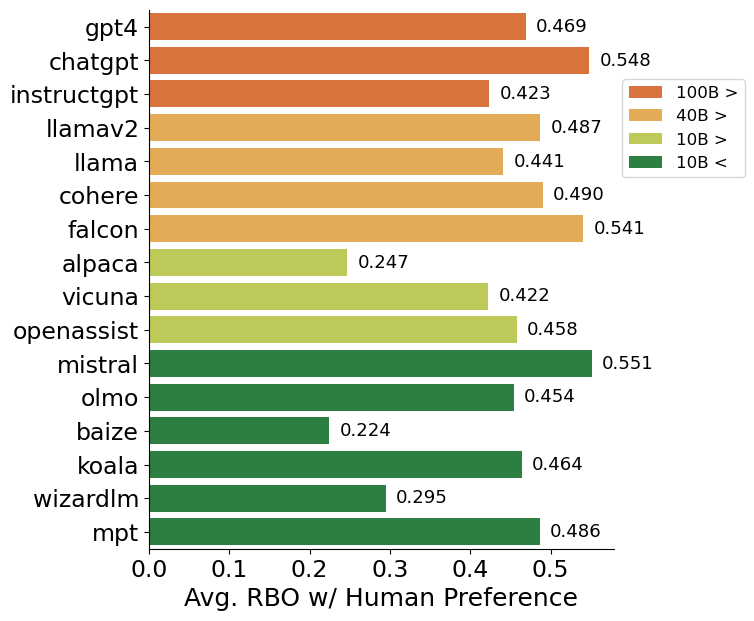

In [52]:
model_names = model_names_combined
avg_rbo_human_machine = np.append(np.mean(old_rbo_mat, axis=0), [llama2_rbo, mistral_rbo, olmo_rbo])

model_positions = [8, 12, 13, 14, 1, 2, 0, 5, 9, 15, 7, 6, 4, 3, 10, 11]
model_params = ['10B >', '10B <', '10B <', '10B <', '100B >', '100B >', '100B >', '40B >', '10B >', '10B <', '10B >', '40B >', '40B >', '40B >', '10B <', '10B <']
param_orders = ['100B >', '40B >', '10B >', '10B <']
group_colors = {
    "100B >": '#F26B21',
    "40B >": '#FBB040',
    "10B >": '#CBDB47',
    "10B <": '#208B3A',
}

df = pd.DataFrame(data={'model_names': model_names, 'avg_rbo_human_machine': avg_rbo_human_machine, 'position': model_positions, 'model_param': model_params})
plt.figure(figsize=(6,7))
ax = sns.barplot(x='avg_rbo_human_machine', y='position', data=df, orient='h', hue='model_param',hue_order=param_orders, dodge=False, palette=group_colors)
sns.despine()

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width+0.045,       # set the text at 3 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width), # set variable to display, 2 decimals
            ha = 'center',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment


plt.legend(title='', fontsize=12, bbox_to_anchor= (1,0.78))
plt.tick_params(labelsize=17)
plt.yticks(df['position'], df['model_names'])
# plt.yticks(rotation=45, ha='right')
plt.ylabel('', fontsize=20)
plt.xlabel('Avg. RBO w/ Human Preference', fontsize=18)
plt.savefig('avg_rbo_machine_human.pdf', format="pdf", bbox_inches="tight")

In [53]:
df.groupby(['model_param'])['avg_rbo_human_machine'].mean()

model_param
100B >    0.480167
10B <     0.412389
10B >     0.375611
40B >     0.489833
Name: avg_rbo_human_machine, dtype: float64

## Model-Model Correlation Matrix

In [54]:
all_model_rank_combined = {**sorted_rank_data, **sorted_rank_llama2, **sorted_rank_mistral, **sorted_rank_olmo}

In [55]:
all_model_rank_combined.keys()

dict_keys(['vicuna', 'baize', 'koala', 'wizardlm', 'chatgpt', 'instructgpt', 'gpt4', 'cohere', 'openassist', 'mpt', 'alpaca', 'falcon', 'llama', 'llama2', 'mistral', 'olmo'])

In [56]:
def compute_rbo_machine_machine(combined_sorted_rank_data):
    rbo_matrix = np.zeros((16, 16))
    all_model_names = list(combined_sorted_rank_data.keys())
    
    for i in range(16):
        for j in range(16):
            model_name_i = all_model_names[i]
            model_name_j = all_model_names[j]

            model_i = combined_sorted_rank_data[model_name_i]
            model_j = combined_sorted_rank_data[model_name_j]

            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo_ext(p=0.8) for a, b in zip(model_i, model_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)

            rbo_matrix[i, j] = avg_rbo

    return rbo_matrix

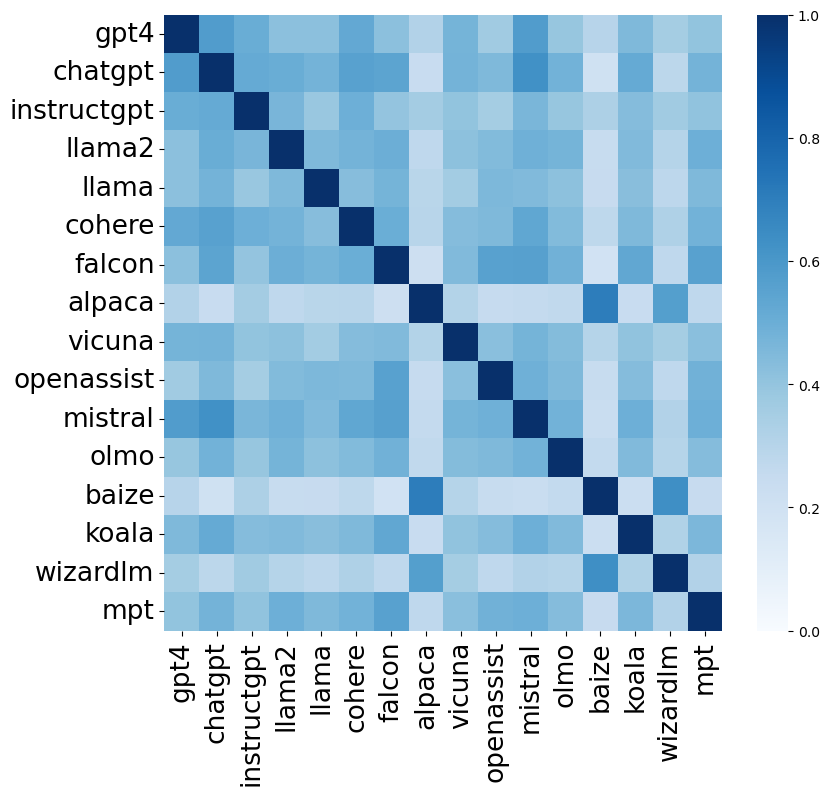

In [57]:
reordered_model_names = ['gpt4', 'chatgpt', 'instructgpt', 'llama2', 'llama', 'cohere', 'falcon', 'alpaca', 'vicuna', 'openassist', 'mistral', 'olmo', 'baize', 'koala', 'wizardlm', 'mpt']
reordered_model_rank_data = {key: all_model_rank_combined[key] for key in reordered_model_names}

model_to_model_rbo = pd.DataFrame(compute_rbo_machine_machine(reordered_model_rank_data))

mask = np.triu(np.ones_like(model_to_model_rbo, dtype=bool))

plt.figure(figsize=(9,8))
sns.heatmap(model_to_model_rbo, fmt=".3f", cmap='Blues', xticklabels=reordered_model_names, yticklabels=reordered_model_names, vmax=1, vmin=0)
plt.tick_params(labelsize=19)
plt.xticks(rotation=90)
plt.savefig('model_to_model.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Position-wise averaged ranking correlation

In [53]:
with open('human_annotations/annot_1.json', 'r') as f:
    annot_0 = json.load(f)
f.close()
with open('human_annotations/annot_2.json', 'r') as f:
    annot_1 = json.load(f)
f.close()
with open('human_annotations/annot_3.json', 'r') as f:
    annot_2 = json.load(f)
f.close()
with open('human_annotations/annot_4.json', 'r') as f:
    annot_3 = json.load(f)
f.close()
with open('human_annotations/annot_5.json', 'r') as f:
    annot_4 = json.load(f)
f.close()
with open('human_annotations/annot_6.json', 'r') as f:
    annot_5 = json.load(f)    

f.close()

In [54]:
def position_wise_rank_normalization(input_dicts): # List of input dictionaries
    # Initialize the result list
    result_list = []

    # Iterate through the input dictionaries
    for dicts in zip(*input_dicts):
        sum_dict = {}
        for dict_ in dicts:
            for key, value in dict_.items():
                sum_dict[key] = sum_dict.get(key, 0) + value
        result_list.append(sum_dict)

    sorted_models = []
    sorted_counts = []

    for dictionary in result_list:
        sorted_keys = sorted(dictionary.keys(), key=lambda key: dictionary[key], reverse=True)
        sorted_values = sorted(dictionary.values(), reverse=True)
        sorted_avg_values = [count/105 for count in sorted_values]
        sorted_models.append(sorted_keys)
        sorted_counts.append(sorted_avg_values)

    return (sorted_models, sorted_counts)

In [55]:
avg_normalized_human, d = position_wise_rank_normalization([annot_0, annot_1, annot_2, annot_3, annot_4, annot_5])
# avg_normalized_human, d = position_wise_rank_normalization([annot_2, annot_3, annot_4, annot_5])

np.array(avg_normalized_human).shape


(50, 15)

In [56]:
# with open('avg_count_by_instruction.json', 'w') as f:
#     json.dump(d, f, indent=4)

In [57]:
avg_normalized_machine, _ = position_wise_rank_normalization(list(model_rank_data.values()))
np.array(avg_normalized_machine).shape

(50, 15)

In [60]:
def rbo_human_avg_machine(annotator_matrices_x, annotator_matrices_y, num_x, num_y, k): #rbo 
    rbo_matrix = np.zeros((num_x, 1))

    avg_iaa_lst = []
    for i in range(num_x): # num on x-axis
        for j in range(i+1, num_y): # num on y-axis   
            flat_annotator_i = [sublist for sublist in annotator_matrices_x[i]]
            flat_annotator_j = [sublist for sublist in annotator_matrices_y[j]]
            all_rbo_scores = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(flat_annotator_i, flat_annotator_j)]
            avg_rbo = sum(all_rbo_scores)/len(all_rbo_scores)
            avg_rbo = round(avg_rbo, 3)
            rbo_matrix[i, j] = avg_rbo
            if avg_rbo != 1:
                avg_iaa_lst.append(avg_rbo)

    avg_iaa = sum(avg_iaa_lst)/len(avg_iaa_lst)

    print("Pairwise Rank-biased Overlap Matrix: ")
    print("Average IAA scores: ", avg_iaa)
    print(rbo_matrix)
    return avg_iaa

[['gpt4',
  'wizardlm',
  'cohere',
  'chatgpt',
  'alpaca',
  'dolly',
  'baize',
  'instructgpt',
  'falcon',
  'koala',
  'openassist',
  'vicuna',
  'llama',
  'mpt',
  'redpajama'],
 ['koala',
  'gpt4',
  'wizardlm',
  'chatgpt',
  'cohere',
  'openassist',
  'vicuna',
  'instructgpt',
  'dolly',
  'alpaca',
  'baize',
  'falcon',
  'llama',
  'redpajama',
  'mpt'],
 ['koala',
  'gpt4',
  'chatgpt',
  'wizardlm',
  'falcon',
  'openassist',
  'vicuna',
  'instructgpt',
  'cohere',
  'baize',
  'alpaca',
  'mpt',
  'llama',
  'dolly',
  'redpajama'],
 ['chatgpt',
  'gpt4',
  'wizardlm',
  'koala',
  'cohere',
  'baize',
  'vicuna',
  'instructgpt',
  'openassist',
  'falcon',
  'alpaca',
  'llama',
  'mpt',
  'dolly',
  'redpajama'],
 ['alpaca',
  'gpt4',
  'cohere',
  'falcon',
  'koala',
  'wizardlm',
  'dolly',
  'chatgpt',
  'baize',
  'openassist',
  'vicuna',
  'instructgpt',
  'llama',
  'mpt',
  'redpajama'],
 ['baize',
  'instructgpt',
  'chatgpt',
  'vicuna',
  'wizardlm'

In [58]:
avg_normalized_human_machine_rbo = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, avg_normalized_machine)]
sum(avg_normalized_human_machine_rbo)/len(avg_normalized_human_machine_rbo)

0.4963014255711763

In [59]:
def position_wise_rbo_human_machine_pairwise(avg_normalized_human, model_ranked_data):

    rbo_dict = {}
    for model_name, rank_outputs in model_ranked_data.items():
        ranking_by_models = []
        for example_dict in rank_outputs:
            sorted_model = sorted(example_dict.keys(), key=lambda key: example_dict[key], reverse=True) # top five models 
            ranking_by_models.append(sorted_model)

        # rbo_score = []
        # for i in range(50): # compute average rbo scores between aggregrated human scores and each model evaluation
        #     rb = rbo.RankingSimilarity(avg_normalized_human[i], top_five_by_models[i]).rbo()
        #     rbo_score.append(rb)

        rbo_pairwise = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, ranking_by_models)]
        avg_rbo_pairwise = round(sum(rbo_pairwise)/len(rbo_pairwise), 3)

        rbo_dict[model_name] = avg_rbo_pairwise

    print(rbo_dict)
    return rbo_dict 

In [59]:
position_rbo_human_machine = position_wise_rbo_human_machine_pairwise(avg_normalized_human, model_rank_data)

{'vicuna': 0.524, 'baize': 0.11, 'koala': 0.509, 'wizardlm': 0.223, 'chatgpt': 0.619, 'instructgpt': 0.395, 'gpt4': 0.456, 'cohere': 0.529, 'dolly': 0.607, 'openassist': 0.467, 'redpajama': 0.255, 'mpt': 0.502, 'alpaca': 0.153, 'falcon': 0.57, 'llama': 0.471}


In [60]:
np.mean(list(position_rbo_human_machine.values()))

0.426

Text(0.5, 0, 'Avg. RBO w/ Human Preference')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

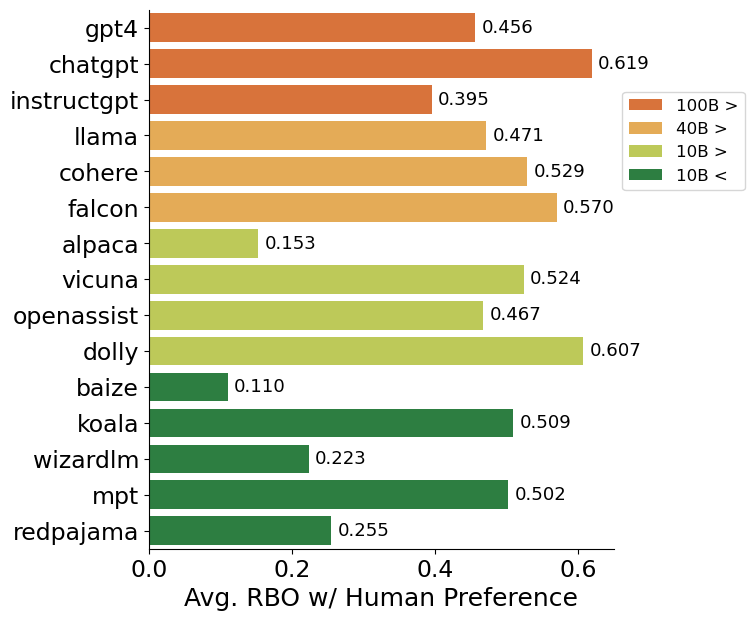

In [61]:
model_names = list(position_rbo_human_machine.keys())
avg_rbo_human_machine = list(position_rbo_human_machine.values())
model_positions = [7, 10, 11, 12, 1, 2, 0, 4, 9, 8, 14, 13, 6, 5, 3]
model_params = ['10B >', '10B <', '10B <', '10B <', '100B >', '100B >', '100B >', '40B >', '10B >', '10B >', '10B <', '10B <', '10B >', '40B >', '40B >']
param_orders = ['100B >', '40B >', '10B >', '10B <']
group_colors = {
    "100B >": '#F26B21',
    "40B >": '#FBB040',
    "10B >": '#CBDB47',
    "10B <": '#208B3A',
}
df = pd.DataFrame(data={'model_names': model_names, 'avg_rbo_human_machine': avg_rbo_human_machine, 'position': model_positions, 'model_param': model_params})
plt.figure(figsize=(6,7))
ax = sns.barplot(x='avg_rbo_human_machine', y='position', data=df, orient='h', hue='model_param',hue_order=param_orders, dodge=False, palette=group_colors)
sns.despine()

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width+0.045,       # set the text at 3 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width), # set variable to display, 2 decimals
            ha = 'center',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment


plt.legend(title='', fontsize=12, bbox_to_anchor= (1,0.65))
plt.tick_params(labelsize=17)
plt.yticks(df['position'], df['model_names'])
# plt.yticks(rotation=45, ha='right')
plt.ylabel('', fontsize=20)
plt.xlabel('Avg. RBO w/ Human Preference', fontsize=18)
# plt.savefig('fig.pdf', format="pdf", bbox_inches="tight")

In [165]:
df.groupby(['model_param'])['avg_rbo_human_machine'].mean()

model_param
100B >    0.463889
10B <     0.399972
10B >     0.356611
40B >     0.471875
Name: avg_rbo_human_machine, dtype: float64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_names            16 non-null     object 
 1   avg_rbo_human_machine  16 non-null     float64
 2   position               16 non-null     int64  
 3   model_param            16 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


Find some instances of misalignment

In [62]:
def instance_human_machine_misalign(avg_normalized_human, model_ranked_data, model_name, threshold_common):

    ranking_by_models = []
    for example_dict in model_ranked_data[model_name]:
        sorted_model = sorted(example_dict.keys(), key=lambda key: example_dict[key], reverse=True) # top five models 
        ranking_by_models.append(sorted_model)

    rbo_pairwise = [rbo.RankingSimilarity(a,b).rbo(p=0.8) for a, b in zip(avg_normalized_human, ranking_by_models)]

    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    with open('examples.json', 'r') as j:
        data_info = json.load(j)

    agg_misalign_data = []
    for i, (a, b) in enumerate(zip(avg_normalized_human, ranking_by_models)):

        model_lst = list(model_info[i].keys())
        system_lst = list(model_info[i].values())

        misalign_data = {}
        human_top5 = a[:5]
        machine_top5 = b[:5]
        misalign_check = any(model in human_top5 for model in machine_top5)

        if misalign_check ==  False: # no common models in human and machine
            print(f"instruction idx: {i}")
            print(f"human top5: {human_top5}")
            print(f"machine top 5: {machine_top5}")
            print(f"--------------------")

            misalign_data['instruction'] = data_info[i]['instruction']
            misalign_data['reference'] = data_info[i]['reference']

            human = {}
            machine = {}

            for model in human_top5:
                corr_system_idx = model_lst.index(model)
                corr_system_name = system_lst[corr_system_idx]
                corr_system_answer = data_info[i][corr_system_name]

                human[model] = corr_system_answer

            for model in machine_top5:
                corr_system_idx = model_lst.index(model)
                corr_system_name = system_lst[corr_system_idx]
                corr_system_answer = data_info[i][corr_system_name]

                machine[model] = corr_system_answer
                

            misalign_data['human_top5'] = human
            misalign_data['machine_top5'] = machine
            misalign_data['avg_rbo_w_human'] = rbo_pairwise[i] # total
            
        else:
            common_models = [model for model in human_top5 if model in machine_top5]
            if len(common_models) < threshold_common:
                print(f"instruction idx: {i}")
                print(f"human top5: {human_top5}")
                print(f"machine top 5: {machine_top5}")
                print(f"--------------------")

                misalign_data['instruction'] = data_info[i]['instruction']
                misalign_data['reference'] = data_info[i]['reference']

                human = {}
                machine = {}

                for model in human_top5:
                    corr_system_idx = model_lst.index(model)
                    corr_system_name = system_lst[corr_system_idx]
                    corr_system_answer = data_info[i][corr_system_name]

                    human[model] = corr_system_answer

                for model in machine_top5:
                    corr_system_idx = model_lst.index(model)
                    corr_system_name = system_lst[corr_system_idx]
                    corr_system_answer = data_info[i][corr_system_name]

                    machine[model] = corr_system_answer
                    

                misalign_data['human_top5'] = human
                misalign_data['machine_top5'] = machine
                misalign_data['avg_rbo_w_human'] = rbo_pairwise[i] # total

                agg_misalign_data.append(misalign_data)

    with open('misalign_instances_{}.json'.format(model_name), 'w') as k:
        json.dump(agg_misalign_data, k, indent=4)

In [63]:
instance_human_machine_misalign(avg_normalized_human, model_rank_data, 'mpt', 2)

instruction idx: 27
human top5: ['baize', 'vicuna', 'gpt4', 'chatgpt', 'wizardlm']
machine top 5: ['dolly', 'openassist', 'redpajama', 'falcon', 'chatgpt']
--------------------
instruction idx: 37
human top5: ['baize', 'chatgpt', 'cohere', 'gpt4', 'instructgpt']
machine top 5: ['koala', 'alpaca', 'dolly', 'chatgpt', 'mpt']
--------------------


In [64]:
def instance_human_ranking(avg_normalized_human): # For Jong Inn's Webpage

    with open('model_annotations/human_annotation_gt_formatted.json', 'r') as f:
        model_info = json.load(f)
    with open('examples.json', 'r') as j:
        data_info = json.load(j)

    agg_human_data = []
    for i, a in enumerate(avg_normalized_human):

        model_lst = list(model_info[i].keys())
        system_lst = list(model_info[i].values())

        example_data = {}

        example_data['instruction'] = data_info[i]['instruction']
        example_data['reference'] = data_info[i]['reference']

        for model in a:
            corr_system_idx = model_lst.index(model)
            corr_system_name = system_lst[corr_system_idx]
            corr_system_answer = data_info[i][corr_system_name]

            example_data[model] = corr_system_answer
        
        agg_human_data.append(example_data)

    with open('normalized_human_ranking.json', 'w') as k:
        json.dump(agg_human_data, k, indent=4)

In [65]:
instance_human_ranking(avg_normalized_human)

# 3. Bias correlation

In [66]:
bias_types = ['bandwagon', 'compassion', 'distraction', 'frequency', 'order', 'salience', 'selective']
model_names = ['alpaca', 'baize', 'chatgpt', 'cohere', 'falcon', 'gpt4', 'dolly', 'instructgpt', 'koala', 'llama', 'mpt', 'openassist', 'redpajama', 'vicuna', 'wizardlm']

In [67]:
def correct_preferences_format(bias_types): 
    for bias in bias_types: # for each bias folder path
        # formatting to be readable with json.load()
        bias_path = 'bias/' + bias 
        for model_json in os.listdir(bias_path): 
            if model_json.endswith('.json'):
                file_path = os.path.join(bias_path, model_json)
                with open(file_path, 'r') as file:
                    json_string = file.read()
                if json_string.startswith('['):
                    pass
                else:
                    formatted_json = "[" + re.sub(r'}\s*{', '},{', json_string) + "]"
                with open(file_path, 'w') as write:
                    write.write(formatted_json)                    

In [68]:
# correct_preferences_format(bias_types)

### Comparing biases within same model outputs

In [69]:
available_models = ['chatgpt', 'cohere', 'gpt4', 'instructgpt']
model_bias_data = {}
for model in available_models:
    print('loading the model {}'.format(model))
    bias_rank_data = {}
    for bias in bias_types:
        bias_path = 'bias/' + bias 
        if len(os.listdir(bias_path)) != 0:
            with open('bias/{}/nC2_preferences_{}.json'.format(bias, model), 'r') as f:
                data = json.load(f)
            bias_rank_data[bias] = data

    model_bias_data[model] = bias_rank_data

loading the model chatgpt


FileNotFoundError: [Errno 2] No such file or directory: 'bias/bandwagon'

In [ ]:
for model, _ in model_bias_data.items():
    print(f"Model Name: {model}")
    bias_collection = model_bias_data[model]
    bias_rbo_matrix = np.zeros((6, 6)) # all biases except salience
    agg_model_data = []
    # for each model there will be six biases
    for bias, _ in bias_collection.items():
        bias_values = bias_collection[bias] # [{}, ..., {}]
        biases_top5 = []
        for example_dict in bias_values:
            sorted_rank_top5 = sorted(example_dict.keys(), key=lambda key:example_dict[key], reverse=True)[:5] # top 5 choices
            biases_top5.append(sorted_rank_top5)
        agg_model_data.append(biases_top5) # store each bias' top 5 choices

    # Compute rbo between biases under the same model 
    for i in range(bias_rbo_matrix.shape[0]):
        for j in range(i+1, bias_rbo_matrix.shape[1]):
            bias_i = agg_model_data[i]
            bias_j = agg_model_data[j]
            rbo_score = [rbo.RankingSimilarity(a,b).rbo() for a, b in zip(bias_i, bias_j)]
            avg_rbo = round(sum(rbo_score)/len(rbo_score), 3)
            bias_rbo_matrix[i, j] = avg_rbo 

    print("rbo matrix: ")
    print(bias_rbo_matrix)
    print('-----------------------------')

Model Name: chatgpt
rbo matrix: 
[[1.    0.281 0.286 0.285 0.285 0.296]
 [0.    1.    0.492 0.482 0.614 0.536]
 [0.    0.    1.    0.492 0.501 0.495]
 [0.    0.    0.    1.    0.439 0.526]
 [0.    0.    0.    0.    1.    0.518]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: cohere
rbo matrix: 
[[1.    0.319 0.403 0.425 0.367 0.315]
 [0.    1.    0.413 0.368 0.317 0.304]
 [0.    0.    1.    0.502 0.434 0.411]
 [0.    0.    0.    1.    0.42  0.371]
 [0.    0.    0.    0.    1.    0.324]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: gpt4
rbo matrix: 
[[1.    0.72  0.779 0.67  0.764 0.757]
 [0.    1.    0.716 0.679 0.76  0.735]
 [0.    0.    1.    0.722 0.759 0.762]
 [0.    0.    0.    1.    0.666 0.667]
 [0.    0.    0.    0.    1.    0.737]
 [0.    0.    0.    0.    0.    1.   ]]
-----------------------------
Model Name: instructgpt
rbo matrix: 
[[1.    0.231 0.35  0.314 0.308 0.322]
 [0.    1.    0.271 0.137 0.355 0.

### Comparing models under the same bias

In [ ]:
bias_rank_data = {}
for bias in bias_types:
    print('loading {}'.format(bias))
    bias_path = 'bias/' + bias
    if len(os.listdir(bias_path)) != 0: 
        model_rank_data = {}
        model_names = ['chatgpt', 'cohere', 'gpt4', 'instructgpt'] 
        for model in model_names:
            with open('bias/{}/nC2_preferences_{}.json'.format(bias, model), 'r') as f:
                data = json.load(f)
            model_rank_data[model] = data

        bias_rank_data[bias] = model_rank_data

loading bandwagon
loading compassion
loading distraction
loading frequency
loading order
loading salience
loading selective


In [ ]:
for bias, _ in bias_rank_data.items():
    print(f"Bias type: {bias}")
    model_collection = bias_rank_data[bias]
    model_rbo_matrix = np.zeros((4, 4)) # all four models (selected)
    agg_bias_data = []
    # for each bias dict there will be four model keys
    for model, _ in model_collection.items():
        model_values = model_collection[model] # [{}, ..., {}]
        models_top5 = []
        for example_dict in model_values:
            sorted_rank_top5 = sorted(example_dict.keys(), key=lambda key:example_dict[key], reverse=True)[:5] # top 5 choices
            models_top5.append(sorted_rank_top5)
        agg_bias_data.append(models_top5) # store each bias' top 5 choices

    # Compute rbo between biases under the same model 
    for i in range(model_rbo_matrix.shape[0]):
        for j in range(i+1, model_rbo_matrix.shape[1]):
            model_i = agg_bias_data[i]
            model_j = agg_bias_data[j]
            rbo_score = [rbo.RankingSimilarity(a,b).rbo() for a, b in zip(model_i, model_j)]
            avg_rbo = round(sum(rbo_score)/len(rbo_score), 3)
            model_rbo_matrix[i, j] = avg_rbo 

    print("rbo matrix: ")
    print(model_rbo_matrix)
    print('-----------------------------')

Bias type: bandwagon
rbo matrix: 
[[1.    0.266 0.302 0.674]
 [0.    1.    0.399 0.301]
 [0.    0.    1.    0.358]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: compassion
rbo matrix: 
[[1.    0.391 0.46  0.286]
 [0.    1.    0.336 0.349]
 [0.    0.    1.    0.274]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: distraction
rbo matrix: 
[[1.    0.437 0.513 0.46 ]
 [0.    1.    0.436 0.433]
 [0.    0.    1.    0.447]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: frequency
rbo matrix: 
[[1.    0.387 0.519 0.299]
 [0.    1.    0.417 0.433]
 [0.    0.    1.    0.245]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: order
rbo matrix: 
[[1.    0.476 0.488 0.389]
 [0.    1.    0.407 0.364]
 [0.    0.    1.    0.377]
 [0.    0.    0.    1.   ]]
-----------------------------
Bias type: selective
rbo matrix: 
[[1.    0.355 0.491 0.391]
 [0.    1.    0.356 0.333]
 [0.    0.    1.    0.408]
 [0.    0.    0.    1

In [ ]:
agg_bias_data['bandwagon']

TypeError: list indices must be integers or slices, not str

In [ ]:
agg_bias_data['compassion']

[['gpt4',
  'cohere',
  'alpaca',
  'wizardlm',
  'falcon',
  'instructgpt',
  'koala',
  'dolly',
  'mpt',
  'chatgpt',
  'redpajama',
  'llama',
  'baize',
  'openassist',
  'vicuna'],
 ['gpt4',
  'cohere',
  'vicuna',
  'koala',
  'instructgpt',
  'chatgpt',
  'falcon',
  'openassist',
  'wizardlm',
  'redpajama',
  'dolly',
  'alpaca',
  'mpt',
  'baize',
  'llama'],
 ['gpt4',
  'cohere',
  'falcon',
  'chatgpt',
  'koala',
  'baize',
  'instructgpt',
  'wizardlm',
  'vicuna',
  'openassist',
  'llama',
  'mpt',
  'redpajama',
  'alpaca',
  'dolly'],
 ['gpt4',
  'cohere',
  'chatgpt',
  'llama',
  'falcon',
  'alpaca',
  'openassist',
  'koala',
  'mpt',
  'vicuna',
  'wizardlm',
  'baize',
  'instructgpt',
  'dolly',
  'redpajama'],
 ['cohere',
  'alpaca',
  'gpt4',
  'baize',
  'instructgpt',
  'wizardlm',
  'dolly',
  'vicuna',
  'koala',
  'chatgpt',
  'falcon',
  'openassist',
  'llama',
  'mpt',
  'redpajama'],
 ['cohere',
  'gpt4',
  'chatgpt',
  'falcon',
  'instructgpt',
 

In [ ]:
model_names = ['baize', 'chatgpt', 'cohere', 'gpt4', 'instructgpt', 'openassist'] 
agg_bias_rbo_matrix = np.zeros((len(bias_types), len(bias_types)))

bias_types = list(agg_bias_data.keys())

for bias_x in bias_types:
    bias_x_idx = bias_types.index(bias_x)
    print('x: ', bias_x)
    bias_x_data = agg_bias_data[bias_x]
    for bias_y_idx in range(bias_x_idx, len(bias_types)):
        bias_y_key = bias_types[bias_y_idx]
        print('y: ', bias_y_key)
        bias_y_data = agg_bias_data[bias_y_key]

        # calculate rbo scores
        rbo_score = []
        for i in range(50):
            print('i: ', i)
            rb = rbo.RankingSimilarity(bias_x_data[i], bias_y_data[i]).rbo()
            rbo_score.append(rb)

        avg_rbo_whole = round(sum(rbo_score)/len(rbo_score), 3)
        agg_bias_rbo_matrix[bias_x_idx, bias_y_idx] = avg_rbo_whole
    
        print('--------------')

agg_bias_rbo_matrix

x:  bandwagon
y:  bandwagon
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
--------------
y:  compassion
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
--------------
y:  distraction
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i: 

array([[1.   , 0.733, 0.787, 0.775, 0.768, 0.786, 0.   ],
       [0.   , 1.   , 0.776, 0.775, 0.764, 0.765, 0.   ],
       [0.   , 0.   , 1.   , 0.847, 0.843, 0.839, 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.831, 0.834, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.834, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

optional help.py

In [ ]:
def check_answer_for_qualify(df, num_examples=5):
    
    qualified_worker_id = {}
    for worker in range(df.shape[0]):
        each_parsed_answers = parse_amt_answers(df['Answer.taskAnswers'][worker]) # a list of all dictionary example answers
        status = True
        # (1) if answered all examples 
        if len(each_parsed_answers) != num_examples:
            status = False
        # (2) if didn't move anything
        for answer in each_parsed_answers:
            if answer != None:
                if None not in answer['ranking']:
                    status = False
            else:
                status=False
        # # (3) Threshold check
        # if each_parsed_answers[0]['methods'].index('black-bar') != 3:
        #     status = False
        # elif each_parsed_answers[1]['methods'].index('black-bar') != 2:
        #     status = False 
        # elif (each_parsed_answers[2]['methods'].index('black-bar') != 1) & (each_parsed_answers[2]['methods'].index('System D') != 0):
        #     status = False
        # elif each_parsed_answers[3]['methods'].index('black-bar') != 1:
        #     status = False 
        # elif each_parsed_answers[4]['methods'].index('black-bar') != 3:
        #     status = False
        
        # For the answers who passed all requirements, 
        if status == True:
            # qualified_worker_id.append(df['WorkerId'][worker])
            qualified_worker_id[worker] = each_parsed_answers
           

    return qualified_worker_id

In [ ]:
def extracted_data_by_example(A):
    # Initialize empty lists to store the data
    data = []

    # Iterate through the dictionary to extract data
    for annotator, annotations in A.items():
        for annotation in annotations:
            example_index = annotation['exampleIndex']
            methods = annotation['methods']
            data.append([annotator, example_index] + methods)

    # Create a Pandas DataFrame
    columns = ['Annotator', 'ExampleIndex'] + [f'Method_{i+1}' for i in range(16)]
    df = pd.DataFrame(data, columns=columns)

    # Display the DataFrame
    df_d = df.groupby('ExampleIndex').apply(lambda x: x.drop('ExampleIndex', axis=1))
    return df_d

def extracted_data_by_annotator(A):
    # Initialize empty lists to store the data
    data = []

    # Iterate through the dictionary to extract data
    for annotator, annotations in A.items():
        for annotation in annotations:
            example_index = annotation['exampleIndex']
            methods = annotation['methods']
            data.append([annotator, example_index] + methods)

    # Create a Pandas DataFrame
    columns = ['Annotator', 'ExampleIndex'] + [f'Method_{i+1}' for i in range(16)]
    df = pd.DataFrame(data, columns=columns)
    
    return df